In [1]:
ls

sample_data/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wEomvfXkzlZrJb4zAKVvpIibWghj7LZFmDTsLkZwY8SToxT6K8RKEs
Mounted at /content/drive


In [3]:
import tensorflow as tf

In [4]:
cd /content/drive/My Drive/쇼핑광고등어/1. Data/05_분석데이터

/content/drive/.shortcut-targets-by-id/1cWc-Nky29igOCXv9H2nYRUOItUS3kV8X/쇼핑광고등어/1. Data/05_분석데이터


In [5]:
ls

4th_FE_ver1.pkl         4th_FE_ver4_labelE.pkl  Snd_FE.pkl
4th_FE_ver2_dim40.pkl   4th_FE_ver4.pkl         structured_data_regressor/
4th_FE_ver3_dim40.pkl   Fst_FE.pkl              Thd_FE.pkl
4th_FE_ver4_before.pkl  model_1.png


In [6]:
import pandas as pd
import numpy as np

## Data load

In [7]:
import joblib
data = joblib.load('4th_FE_ver4.pkl')

In [8]:
locals().update(data)

In [9]:
X = data['X']
y =data['y']

In [10]:
X.head()

,노출(분),판매단가,방송시간차,상품방송횟수,브랜드방송횟수,조기매진,isHoliday,방송월,방송일,방송시간(분),평일여부,상품군_최고판매단가,상품군_최저판매단가,상품군_중간판매단가,상품군_최고-최저,마더코드_최고판매단가,마더코드_최저판매단가,마더코드_최고-최저,상품군&브랜드_최고판매단가,상품군&브랜드_최저판매단가,상품군&브랜드_중간판매단가,상품군&브랜드_최고-최저,NEW_최고판매단가,NEW_최저판매단가,NEW_중간판매단가,NEW_최고-최저,상품군평균판매단가차이,결합상품,log최근3개월상품군추세,월별판매랑_가구,월별판매랑_가전,월별판매랑_건강기능,월별판매랑_농수축,월별판매랑_무형,월별판매랑_생활용품,월별판매랑_속옷,월별판매랑_의류,월별판매랑_이미용,월별판매랑_잡화,월별판매랑_주방,...,방송시간(시간)_14,방송시간(시간)_15,방송시간(시간)_16,방송시간(시간)_17,방송시간(시간)_18,방송시간(시간)_19,방송시간(시간)_2,방송시간(시간)_20,방송시간(시간)_21,방송시간(시간)_22,방송시간(시간)_23,방송시간(시간)_24,방송시간(시간)_6,방송시간(시간)_7,방송시간(시간)_8,방송시간(시간)_9,방송시간대_밤,방송시간대_아침,방송시간대_오전,방송시간대_오후,방송시간대_저녁,계절_가을,계절_겨울,계절_봄,계절_여름,분기_1분기,분기_2분기,분기_3분기,분기_4분기,성별_0,성별_1,성별_2,상품군_가격대_0.0,상품군_가격대_1.0,상품군_가격대_2.0,전체_가격대_0.0,전체_가격대_1.0,전체_가격대_2.0,전체_가격대_3.0,전체_가격대_4.0
0,20.0,39900,0.0,2.0,21.0,0,1,1,1,0,0,2490000.0,29000.0,59900.0,2461000.0,69900.0,39900.0,30000.0,69900.0,39900.0,59900.0,30000.0,39900.0,39900.0,39900.0,0.0,76662.983425,0,0.0,NaN,9154.0,14055.0,430229.0,0.0,21196.0,135590.0,116043.0,82359.0,19248.0,118147.0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0
1,20.0,39900,0.0,2.0,21.0,0,1,1,1,0,0,2490000.0,29000.0,59900.0,2461000.0,69900.0,39900.0,30000.0,69900.0,39900.0,59900.0,30000.0,39900.0,39900.0,39900.0,0.0,76662.983425,0,0.0,NaN,9154.0,14055.0,430229.0,0.0,21196.0,135590.0,116043.0,82359.0,19248.0,118147.0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0
2,20.0,39900,0.0,2.0,21.0,0,1,1,1,20,0,2490000.0,29000.0,59900.0,2461000.0,69900.0,39900.0,30000.0,69900.0,39900.0,59900.0,30000.0,39900.0,39900.0,39900.0,0.0,76662.983425,0,0.0,NaN,9154.0,14055.0,430229.0,0.0,21196.0,135590.0,116043.0,82359.0,19248.0,118147.0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0
3,20.0,39900,0.0,2.0,21.0,0,1,1,1,20,0,2490000.0,29000.0,59900.0,2461000.0,69900.0,39900.0,30000.0,69900.0,39900.0,59900.0,30000.0,39900.0,39900.0,39900.0,0.0,76662.983425,0,0.0,NaN,9154.0,14055.0,430229.0,0.0,21196.0,135590.0,116043.0,82359.0,19248.0,118147.0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0
4,20.0,39900,0.0,2.0,21.0,0,1,1,1,40,0,2490000.0,29000.0,59900.0,2461000.0,69900.0,39900.0,30000.0,69900.0,39900.0,59900.0,30000.0,39900.0,39900.0,39900.0,0.0,76662.983425,0,0.0,NaN,9154.0,14055.0,430229.0,0.0,21196.0,135590.0,116043.0,82359.0,19248.0,118147.0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0


In [11]:
column_list =[]
for col in X.columns:
  column_list.append(col)

In [12]:
column_list

['노출(분)',
 '판매단가',
 '방송시간차',
 '상품방송횟수',
 '브랜드방송횟수',
 '조기매진',
 'isHoliday',
 '방송월',
 '방송일',
 '방송시간(분)',
 '평일여부',
 '상품군_최고판매단가',
 '상품군_최저판매단가',
 '상품군_중간판매단가',
 '상품군_최고-최저',
 '마더코드_최고판매단가',
 '마더코드_최저판매단가',
 '마더코드_최고-최저',
 '상품군&브랜드_최고판매단가',
 '상품군&브랜드_최저판매단가',
 '상품군&브랜드_중간판매단가',
 '상품군&브랜드_최고-최저',
 'NEW_최고판매단가',
 'NEW_최저판매단가',
 'NEW_중간판매단가',
 'NEW_최고-최저',
 '상품군평균판매단가차이',
 '결합상품',
 'log최근3개월상품군추세',
 '월별판매랑_가구',
 '월별판매랑_가전',
 '월별판매랑_건강기능',
 '월별판매랑_농수축',
 '월별판매랑_무형',
 '월별판매랑_생활용품',
 '월별판매랑_속옷',
 '월별판매랑_의류',
 '월별판매랑_이미용',
 '월별판매랑_잡화',
 '월별판매랑_주방',
 '월별판매랑_침구',
 '시간대별판매랑_가구',
 '시간대별판매랑_가전',
 '시간대별판매랑_건강기능',
 '시간대별판매랑_농수축',
 '시간대별판매랑_무형',
 '시간대별판매랑_생활용품',
 '시간대별판매랑_속옷',
 '시간대별판매랑_의류',
 '시간대별판매랑_이미용',
 '시간대별판매랑_잡화',
 '시간대별판매랑_주방',
 '시간대별판매랑_침구',
 '시간별판매랑_가구',
 '시간별판매랑_가전',
 '시간별판매랑_건강기능',
 '시간별판매랑_농수축',
 '시간별판매랑_무형',
 '시간별판매랑_생활용품',
 '시간별판매랑_속옷',
 '시간별판매랑_의류',
 '시간별판매랑_이미용',
 '시간별판매랑_잡화',
 '시간별판매랑_주방',
 '시간별판매랑_침구',
 '할인율',
 '상품군_zscore',
 '상품군&브랜드_zscore',
 '마더코드_zscore',
 'NEW_zscore',
 'v0',
 'v

In [13]:
emb_list = ['v'+str(j) for j in range(0,90)]
for i in emb_list:
  column_list.remove(i)

In [14]:
num_list = column_list

In [15]:
X_emb = X[emb_list]
X_num = X[num_list]

In [16]:
#X = pd.read_excel("0906_notD.xlsx")

In [17]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35379 entries, 0 to 38303
Columns: 360 entries, 노출(분) to 전체_가격대_4.0
dtypes: float64(286), int64(15), uint8(59)
memory usage: 83.5 MB


In [18]:
X_emb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35379 entries, 0 to 38303
Data columns (total 90 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v0      35379 non-null  float64
 1   v1      35379 non-null  float64
 2   v2      35379 non-null  float64
 3   v3      35379 non-null  float64
 4   v4      35379 non-null  float64
 5   v5      35379 non-null  float64
 6   v6      35379 non-null  float64
 7   v7      35379 non-null  float64
 8   v8      35379 non-null  float64
 9   v9      35379 non-null  float64
 10  v10     35379 non-null  float64
 11  v11     35379 non-null  float64
 12  v12     35379 non-null  float64
 13  v13     35379 non-null  float64
 14  v14     35379 non-null  float64
 15  v15     35379 non-null  float64
 16  v16     35379 non-null  float64
 17  v17     35379 non-null  float64
 18  v18     35379 non-null  float64
 19  v19     35379 non-null  float64
 20  v20     35379 non-null  float64
 21  v21     35379 non-null  float64
 22

## Modeling 

In [19]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, Conv1D
from tensorflow.keras.layers import MaxPooling2D, GlobalMaxPooling1D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate

In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
EPOCH = 200
BATCH_SIZE = 64
reduceLR = ReduceLROnPlateau( 
    monitor='val_loss',  # 모니터 기준 설정 val_loss? val_acc?
    factor=0.5,          # callback 호출시 학습률을 1/2로 줄인다
    patience=15,         # epoch 10 동안 개선되지 않으면 callback이 호출
)

earlystopping = EarlyStopping(monitor='val_loss',  # 모니터 기준 설정 (val_loss) 
                              patience=15,         # 10회 Epoch동안 개선되지 않는다면 종료
                             )
"""
filename = 'checkpoint-epoch-{}-batch-{}-trial-001.h5'.format(EPOCH, BATCH_SIZE)
checkpoint = ModelCheckpoint(filename,             # file명을 지정합니다
                             monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다
                             verbose=1,            # 로그를 출력합니다
                             save_best_only=True,  # 가장 best 값만 저장합니다
                             mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )
                            """

"\nfilename = 'checkpoint-epoch-{}-batch-{}-trial-001.h5'.format(EPOCH, BATCH_SIZE)\ncheckpoint = ModelCheckpoint(filename,             # file명을 지정합니다\n                             monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다\n                             verbose=1,            # 로그를 출력합니다\n                             save_best_only=True,  # 가장 best 값만 저장합니다\n                             mode='auto'           # auto는 알아서 best를 찾습니다. min/max\n                            )\n                            "

## Multi input model

In [36]:

#define loss 

def mean_absolute_percentage_error_ours(y_true, y_pred):
    return tf.reduce_mean(tf.math.abs((tf.math.exp(y_true) - tf.math.exp(y_pred)) / tf.math.exp(y_true)))* 100

def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [22]:

def create_mlp(dim, regress=False):
	# define our MLP network
    model = Sequential()
    model.add(Dense(512, input_dim=dim, activation ='relu', kernel_initializer='he_normal'))
    model.add(Dense(256, activation ='relu', kernel_initializer='he_normal'))
    model.add(Dense(128, activation ='relu', kernel_initializer='he_normal'))
    model.add(Dense(64, activation ='relu', kernel_initializer='he_normal'))
 
    model.add(Dense(128, input_dim=dim, activation ='relu', kernel_initializer='he_normal'))
    model.add(Dense(256, activation ='relu', kernel_initializer='he_normal'))
    model.add(Dense(512, activation ='relu', kernel_initializer='he_normal'))

    #model.add(Dense(64, activation ='relu', kernel_initializer='he_normal'))
    #model.add(Dense(10, activation="LeakyReLU"))
    return model

def create_1Dcnn(dim):
    inputShape = (dim,1)

    Inputs = Input(shape = inputShape)

    conv1 = Conv1D(filters = 64, kernel_size=10,padding = 'valid',activation ='linear', kernel_initializer='he_normal')(Inputs)
    pool1 = GlobalMaxPooling1D()(conv1)

    conv2 = Conv1D(filters = 64, kernel_size=15,padding = 'valid', activation ='linear', kernel_initializer='he_normal')(Inputs)
    pool2 = GlobalMaxPooling1D()(conv2)

    conv3 = Conv1D(filters = 64, kernel_size=20,padding = 'valid', activation ='linear', kernel_initializer='he_normal')(Inputs)
    pool3 = GlobalMaxPooling1D()(conv3)

    concat = concatenate([pool1, pool2, pool3])
    #concat = tf.expand_dims(concat,-1)

    #results = LSTM(64)(concat)
    #results = Dense(32,activation ='linear', kernel_initializer='he_normal')(concat)
    model = Model(Inputs,concat)
    return model


def create_lstm(dim):
    inputShape = (dim,1)
    
    inputs = Input(shape = inputShape)
    print(inputs.shape)
    
    x = LSTM(128)(inputs)
    x = Dropout(0.2)(x)
    x = Dense(64,activation ='relu', kernel_initializer='he_normal')(x)
    print(x)
    model = Model(inputs,x)

    return model


(None, 360, 1)
Tensor("dense_71/Relu:0", shape=(None, 64), dtype=float32)


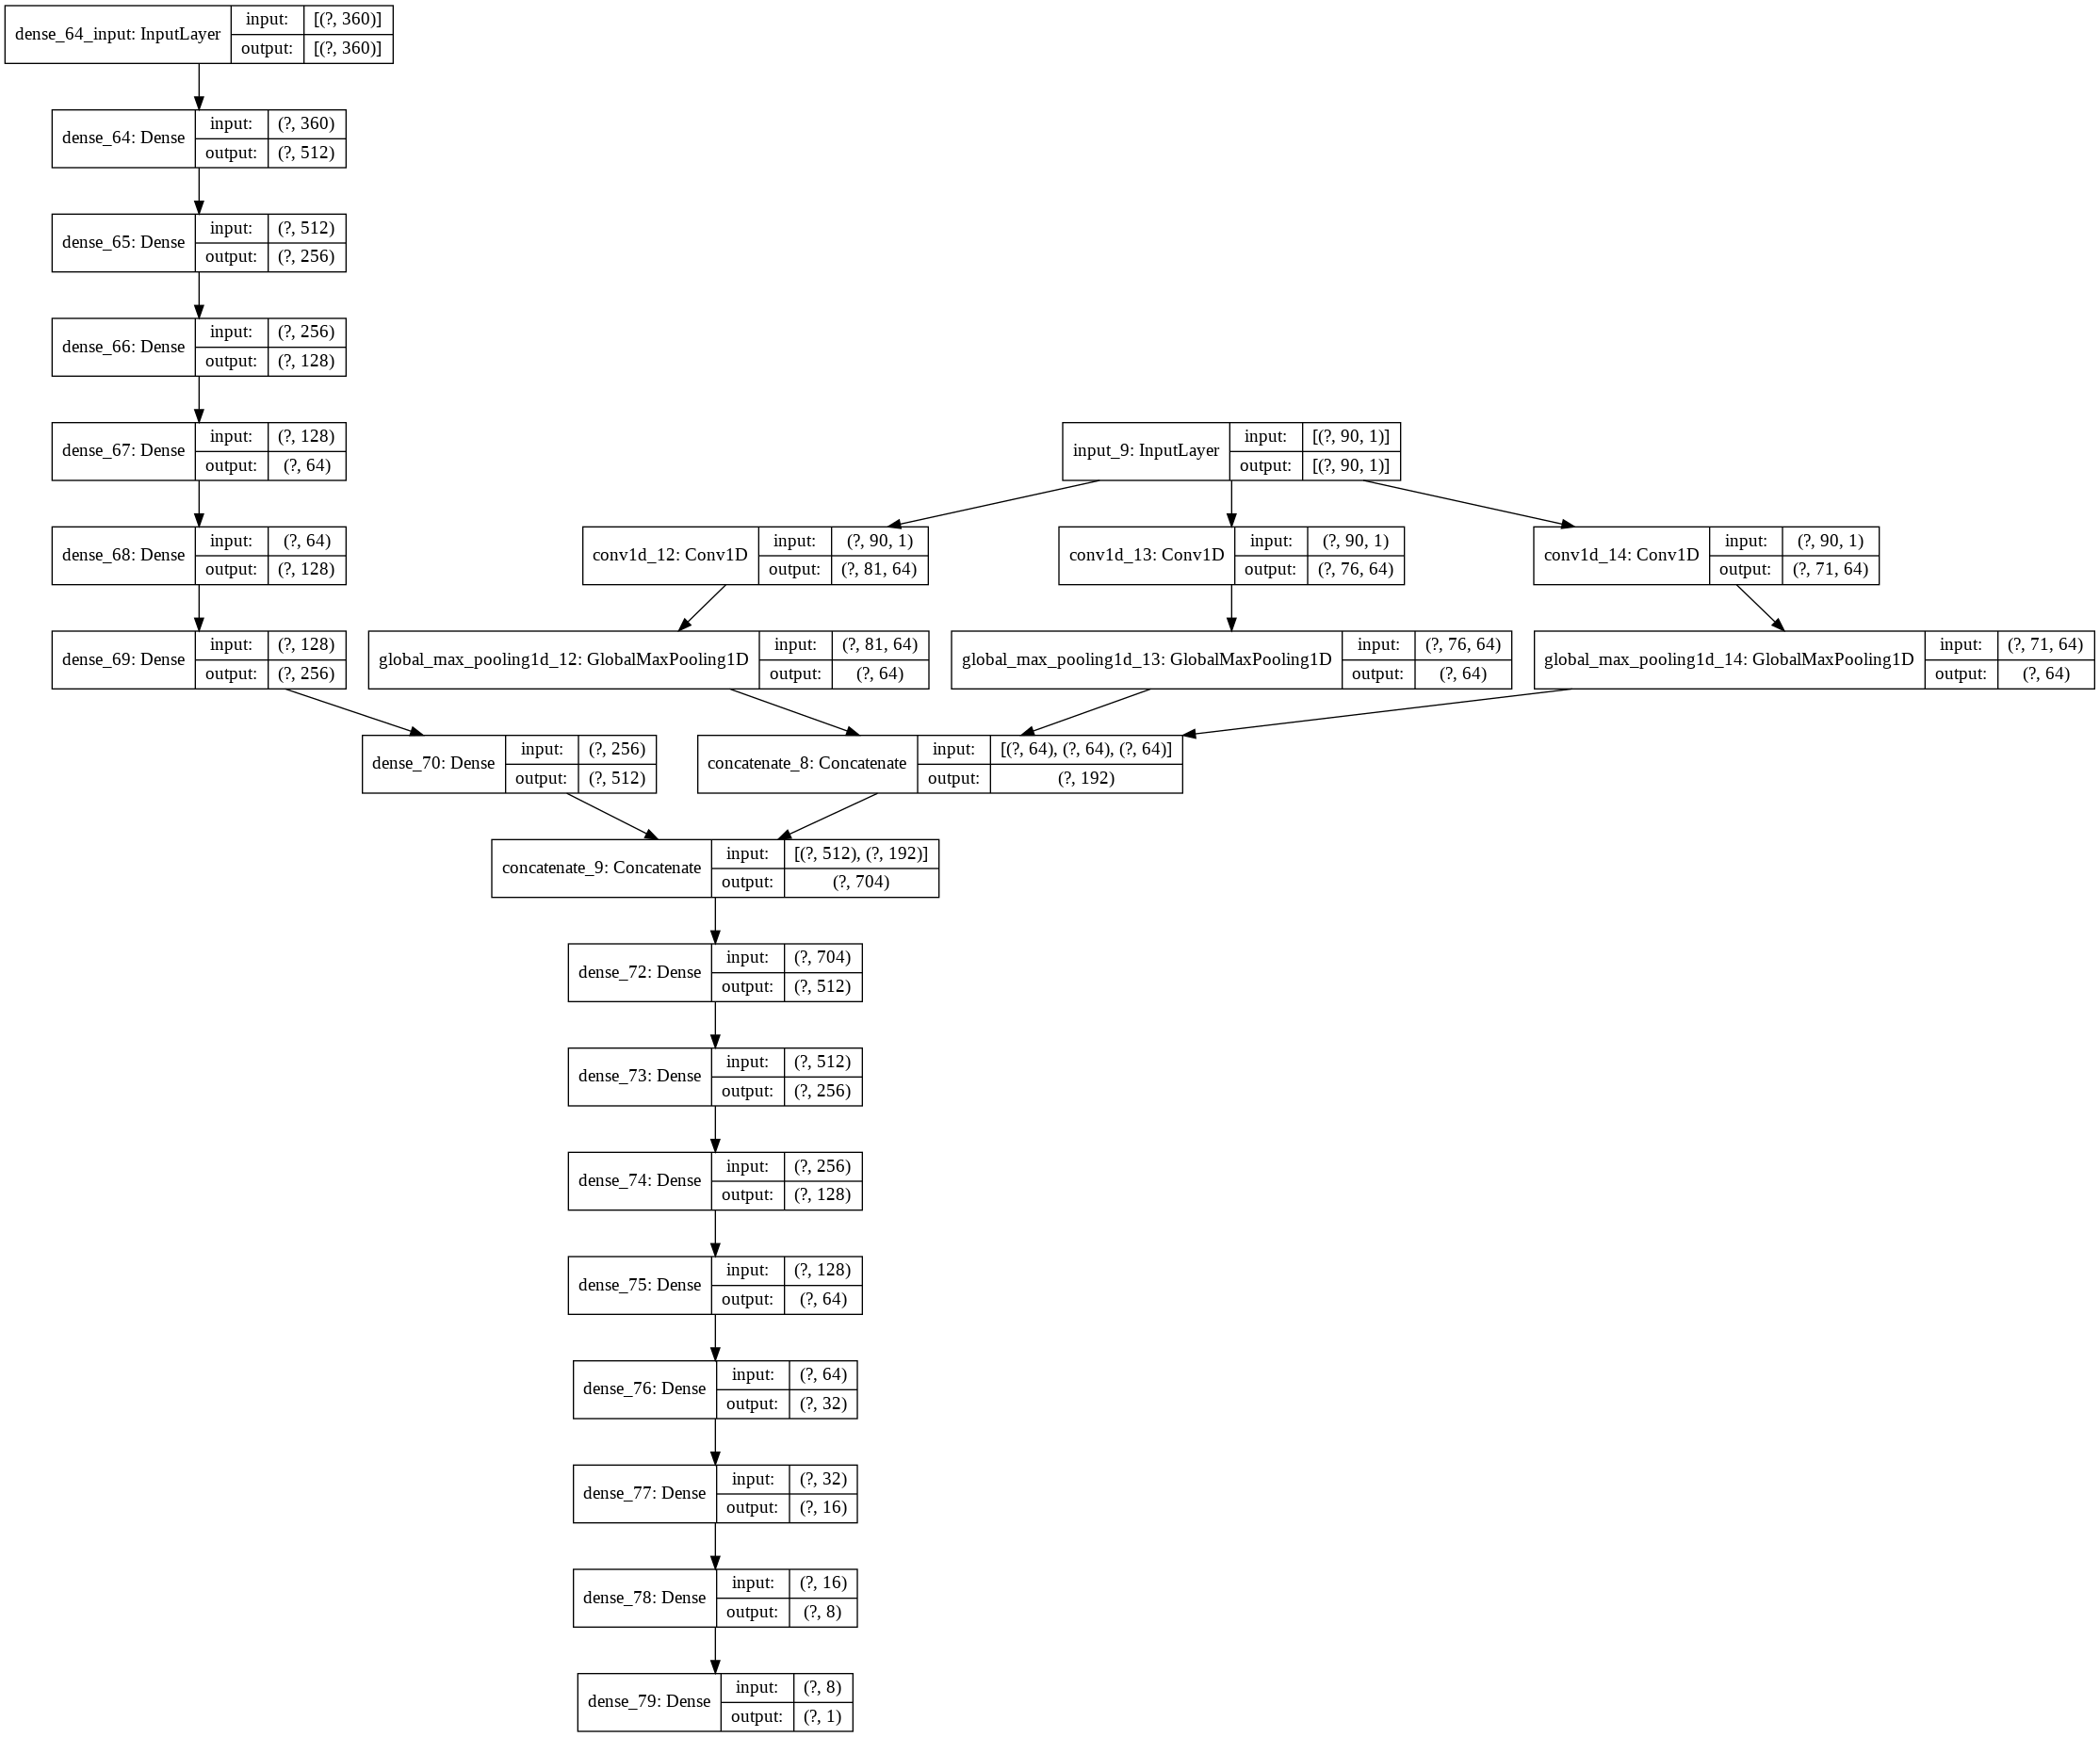

In [37]:

X_num_lstm = X_num.copy() 
X_num_lstm = np.array(X_num_lstm)
X_num_lstm = np.reshape(X_num_lstm,(X_num_lstm.shape[0],X_num_lstm.shape[1],1))
# create the MLP and LSTM models
mlp = create_mlp(X_num.shape[1], regress=False)
cnn = create_1Dcnn(X_emb.shape[1])
lstm = create_lstm((X_num_lstm.shape[1]))
#print(mlp.output, lstm.output)

combinedInput = concatenate([mlp.output, cnn.output])
#combinedInput = tf.expand_dims(combinedInput,-1)

# our final FC layer head will have two dense layers, the final one
# being our regression head
#x = LSTM(5)(combinedInput)
x = Dense(512, activation="selu")(combinedInput)
x = Dense(256, activation="selu")(x)
x = Dense(128, activation="selu")(x)
x = Dense(64, activation="selu")(x)
x = Dense(32, activation="selu")(x)
x = Dense(16, activation="selu")(x)
x = Dense(8, activation="selu")(x)
x = Dense(1, activation="selu")(x)

model = Model(inputs=[mlp.input, cnn.input], outputs=x)


opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss= "mean_absolute_percentage_error",optimizer=opt)

from tensorflow.keras.utils import plot_model

plot_model(model, to_file = 'model_1.png', show_shapes = True, show_layer_names = True)
# train the model


# CV

In [38]:
y = data['y']
y = np.log(y)


In [39]:
preds = {'val_preds' : [], 'test_preds' : []} 
mape = {'val_mape' : [], 'test_mape' : []} 
for i in range(1,13):
  print('처리중인 fold:',i)

  train_idx = X_num[X_num['방송월'] != i ].index
  test_idx = X_num[X_num['방송월'] == i ].index
  
  X_train_num = X_num.loc[train_idx]
  X_train_emb = X_emb.loc[train_idx]
  y_train = y.loc[X_train_num.index]
  
  
  test_num = X_num.loc[test_idx]
  test_emb = X_emb.loc[test_idx]

  X_val_num = test_num.loc[((test_num['방송일'] > 0) & (test_num['방송일'] < 8)) | ((test_num['방송일'] > 15) & (test_num['방송일'] < 24))]
  X_val_emb = test_emb.loc[X_val_num.index]
  y_val = y.loc[X_val_num.index]

  X_test_num = test_num.loc[((test_num['방송일'] > 7) & (test_num['방송일'] < 16)) | ((test_num['방송일'] > 23) & (test_num['방송일'] < 32))]
  X_test_emb = test_emb.loc[X_test_num.index]
  y_test = y.loc[X_test_num.index]



  X_val_num = X_num.loc[test_idx]
  X_val_emb = X_emb.loc[test_idx]
  y_val = y.loc[test_idx]
  
  X_train_emb = np.asarray(X_train_emb).astype(np.float32)
  X_train_emb = np.reshape(X_train_emb,(X_train_emb.shape[0],X_train_emb.shape[1],1))

  X_train_num = np.asarray(X_train_num).astype(np.float32)
  X_train_num = np.reshape(X_train_num,(X_train_num.shape[0],X_train_num.shape[1],1))

  y_train = np.asarray(y_train).astype(np.float32)

  X_test_emb = np.asarray(X_test_emb).astype(np.float32)
  X_test_emb = np.reshape(X_test_emb,(X_test_emb.shape[0],X_test_emb.shape[1],1))
  X_test_num = np.asarray(X_test_num).astype(np.float32)
  X_test_num = np.reshape(X_test_num,(X_test_num.shape[0],X_test_num.shape[1],1))

  y_test = np.asarray(y_test).astype(np.float32)
  
  model.fit(
	x=[X_train_num, X_train_emb], y=y_train,
	validation_data=([X_val_num, X_val_emb], y_val),
	epochs=500,
  callbacks = [reduceLR,earlystopping])

  y_pred = model.predict([X_test_num, X_test_emb])
  val_pred = model.predict([X_val_num, X_val_emb])
  """
  preds['val_preds'].append(val_pred)
  preds['test_preds'].append(y_pred)
  mape['val_mape'].append(MAPE(y_val, val_pred))
  mape['test_mape'].append(MAPE(y_test,y_pred))
  """

  preds['val_preds'].append(np.exp(val_pred))
  preds['test_preds'].append(np.exp(y_pred))
  mape['val_mape'].append(mean_absolute_percentage_error(np.exp(y_val), np.exp(val_pred)))
  mape['test_mape'].append(mean_absolute_percentage_error(np.exp(y_test), np.exp(y_pred)))

  for m, arg in enumerate(zip(mape['val_mape'], mape['test_mape']), 1):
            print(f'{m}월\t', '[val]:', arg[0], '\t[test]', arg[1]) 

처리중인 fold: 1
Epoch 1/500
1020/1020 [==============================] - 5s 5ms/step - loss: 5.0075 - val_loss: 4.4629
Epoch 2/500
1020/1020 [==============================] - 5s 5ms/step - loss: 3.9807 - val_loss: 4.0930
Epoch 3/500
1020/1020 [==============================] - 5s 5ms/step - loss: 3.6987 - val_loss: 3.9108
Epoch 4/500
1020/1020 [==============================] - 5s 5ms/step - loss: 3.5932 - val_loss: 3.9317
Epoch 5/500
1020/1020 [==============================] - 5s 5ms/step - loss: 3.5122 - val_loss: 4.1744
Epoch 6/500
1020/1020 [==============================] - 5s 5ms/step - loss: 3.4349 - val_loss: 3.8880
Epoch 7/500
1020/1020 [==============================] - 5s 5ms/step - loss: 3.3747 - val_loss: 3.7897
Epoch 8/500
1020/1020 [==============================] - 5s 5ms/step - loss: 3.3481 - val_loss: 3.9738
Epoch 9/500
1020/1020 [==============================] - 5s 4ms/step - loss: 3.3167 - val_loss: 3.7363
Epoch 10/500
1020/1020 [==============================] - 5s

최종 Model MAPE

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


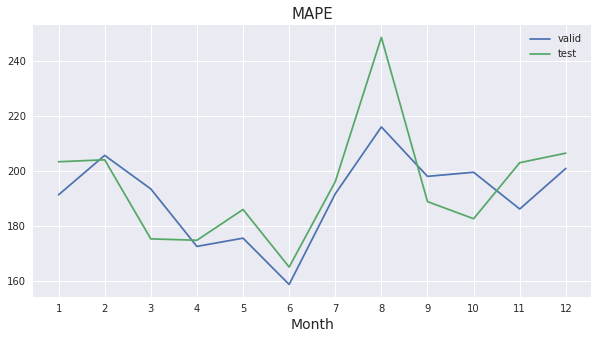

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

plt.figure(figsize = (10, 5))
plt.plot(mape['val_mape'])
plt.plot(mape['test_mape'])
plt.xlabel('Month', fontsize = 14)
plt.title('MAPE', fontsize = 15)
plt.legend(['valid', 'test'])
plt.xticks(np.arange(0,12), np.arange(1,13))
plt.show()